In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle



In [ ]:
# Load the diabetes dataset (assuming CSV file)
df = pd.read_csv('./dataset/diabetes_dataset.csv')  # Replace with the actual path to dataset

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns}")
df_shuffled = shuffle(df, random_state=42).reset_index(drop=True)

print(df_shuffled.head())

print(df.info())  # Display column data types, non-null counts
print(df.isnull().sum())  # Check for missing values

print(df.describe())  # Summary statistics for numerical columns

Dataset Shape: (9538, 17)
Columns: Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')
   Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0   89           10  33.00    132.1          110.0    5.4  110.2  56.5   
1   54           14  21.17    107.5           71.0    4.5   63.9  62.5   
2   41           16  28.83    124.3           88.0    4.5  137.0  56.4   
3   48            1  34.82    106.7           85.0    4.9  169.6   3.8   
4   27           11  32.67    104.1           83.0    5.0  130.2  17.9   

   Triglycerides  WaistCircumference  HipCircumference   WHR  FamilyHistory  \
0          111.3                94.2             105.3  0.89              0   
1          143.1                86.4              94.5  0.91              1   
2           9

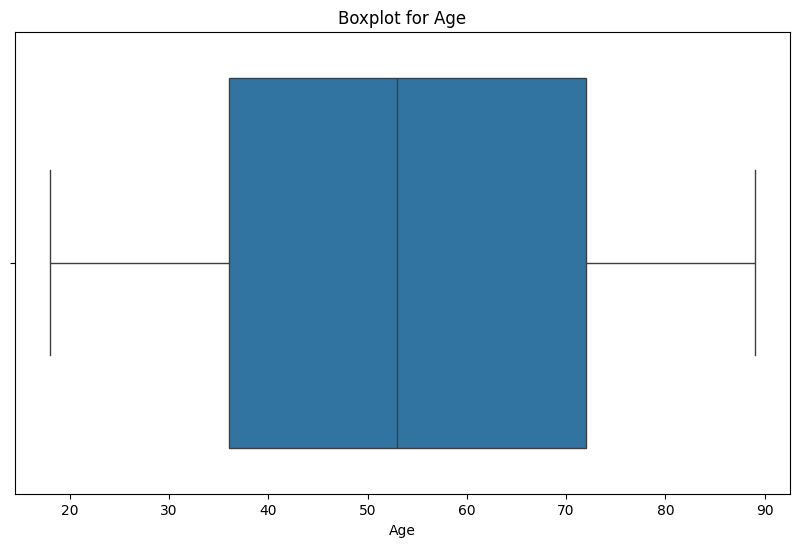

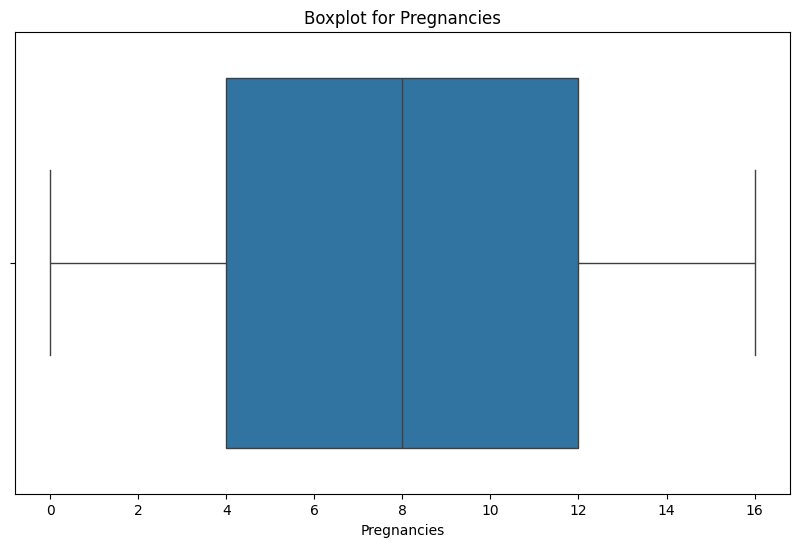

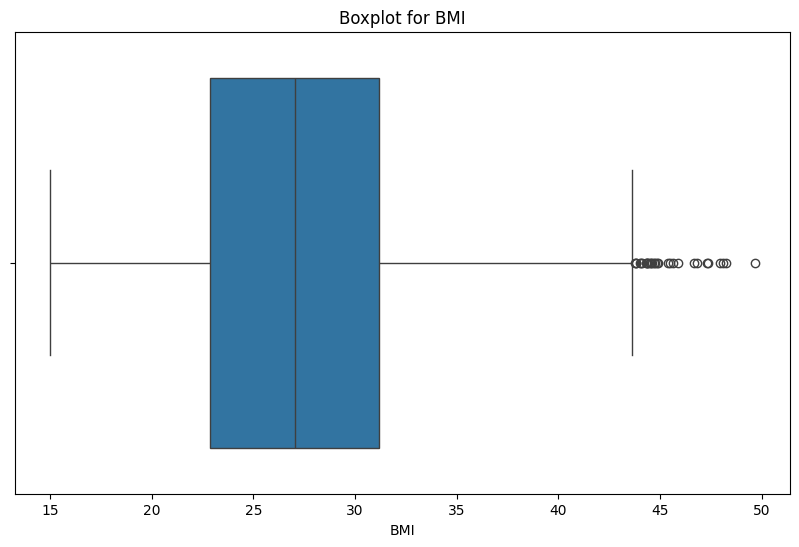

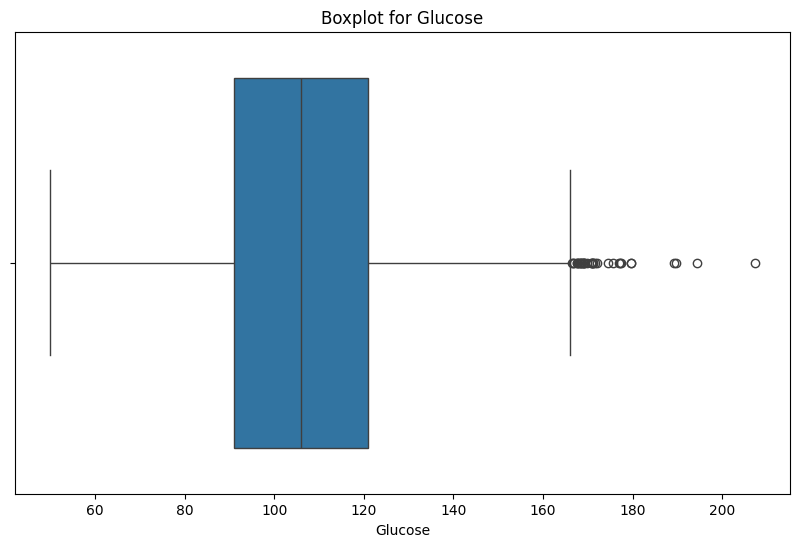

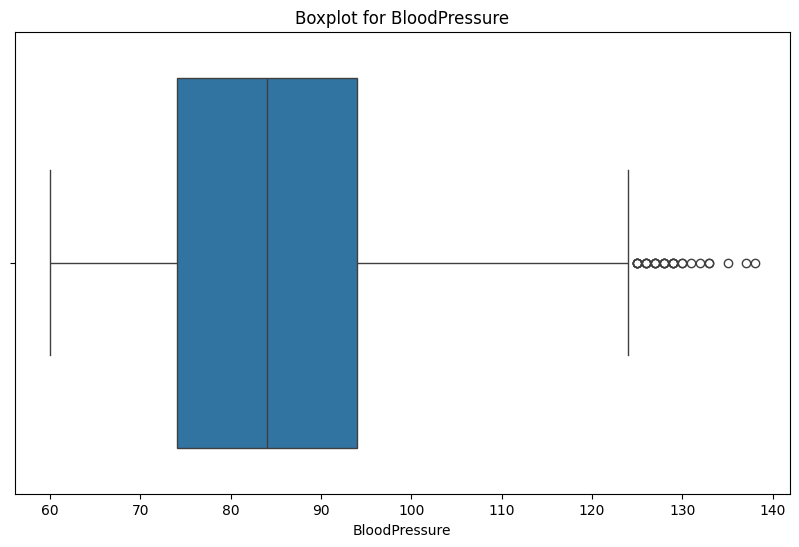

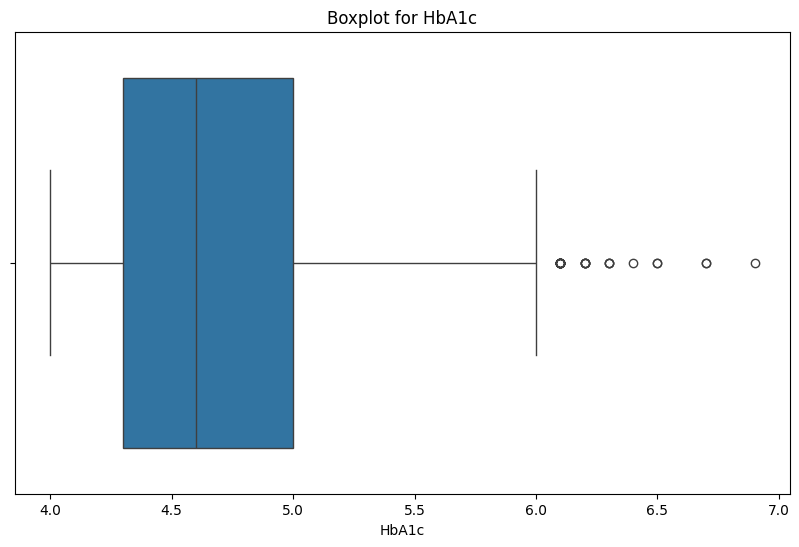

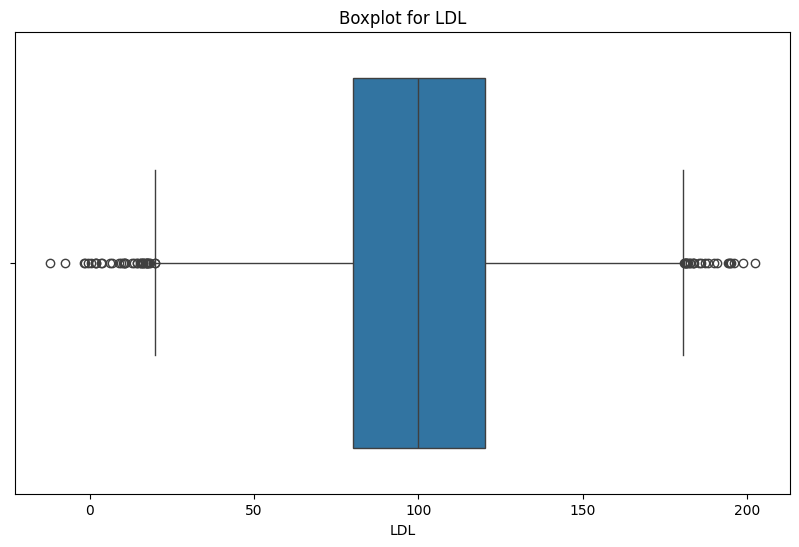

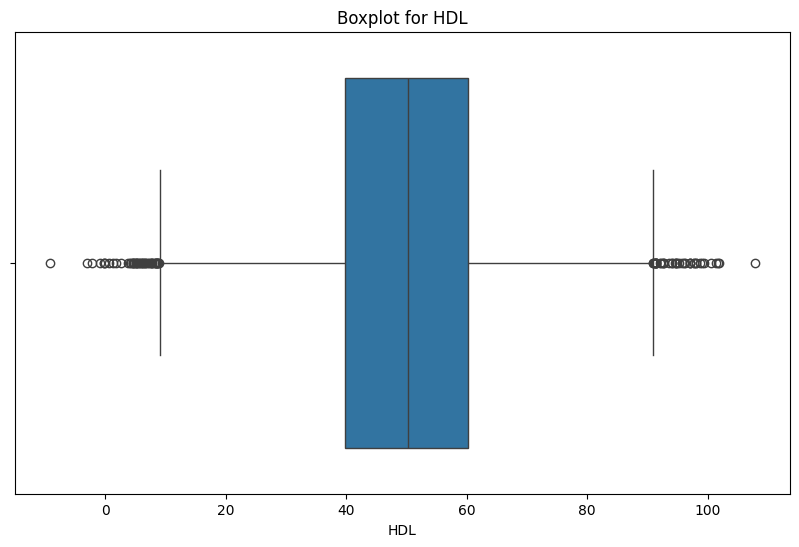

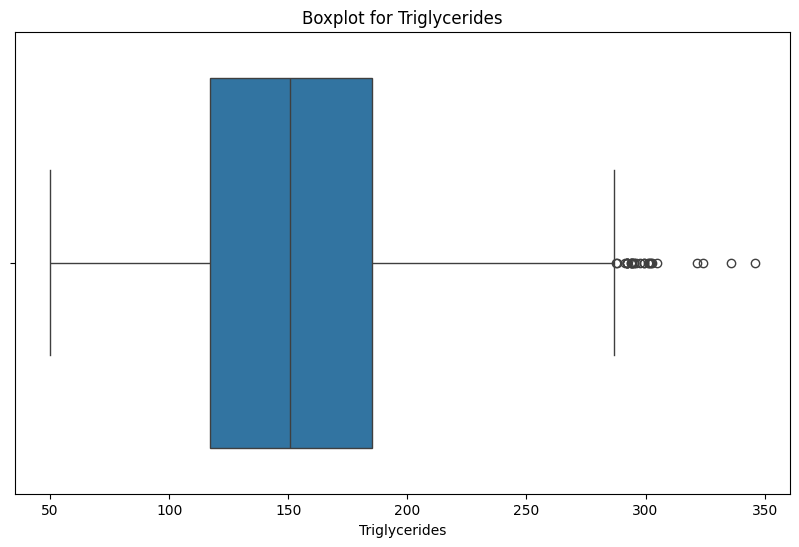

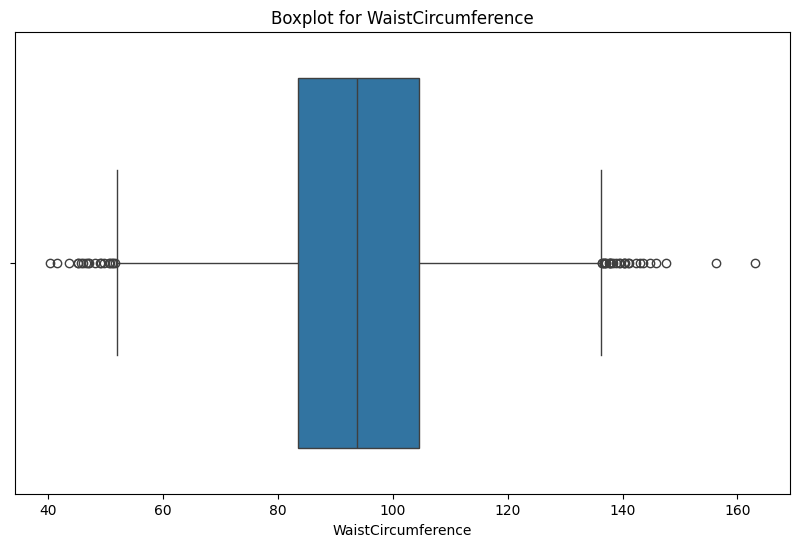

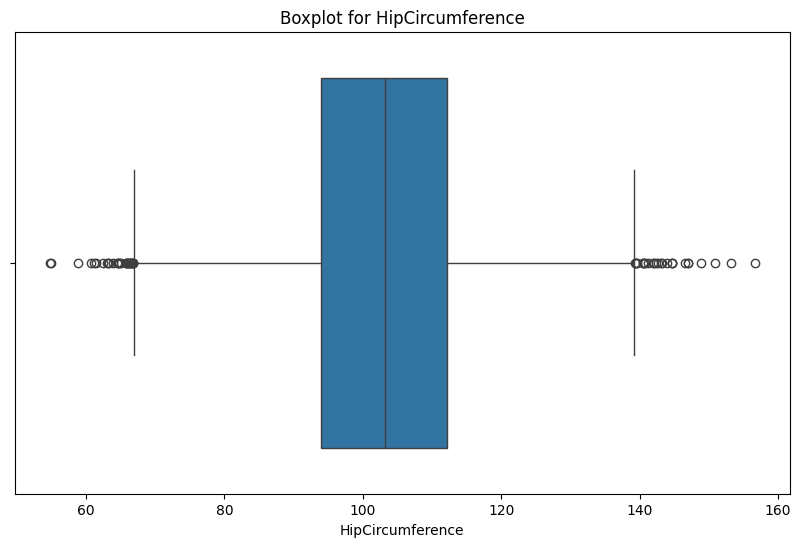

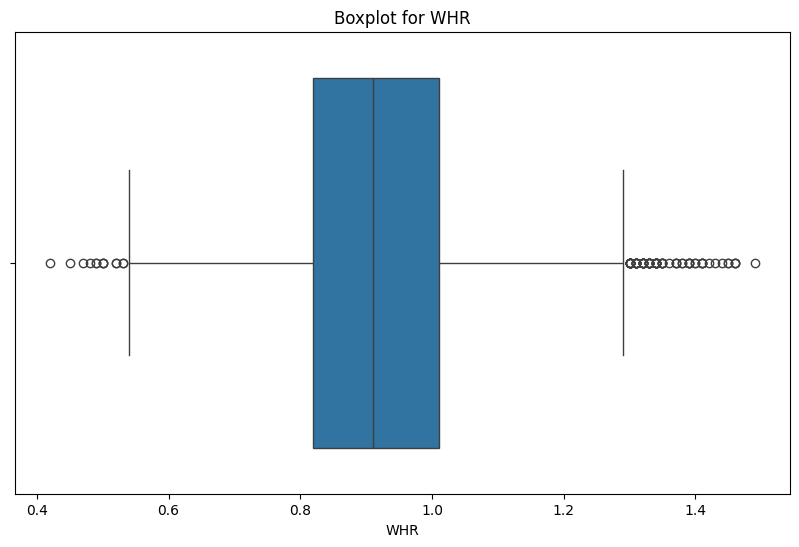

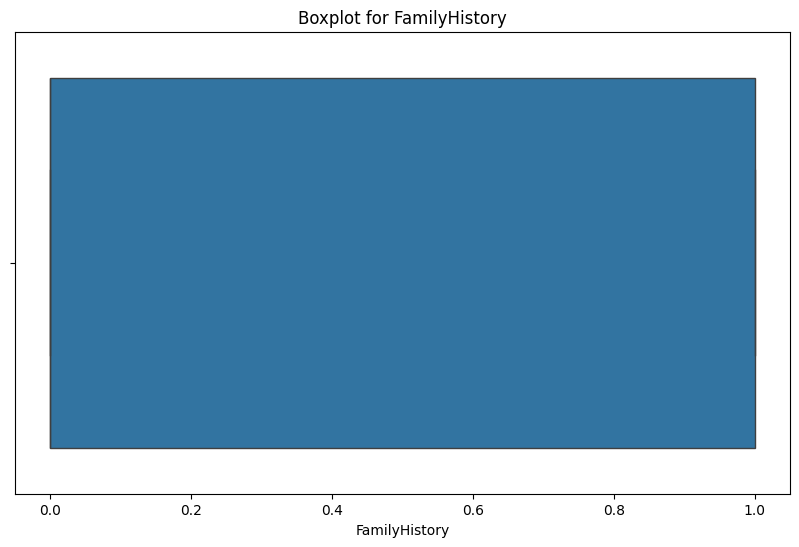

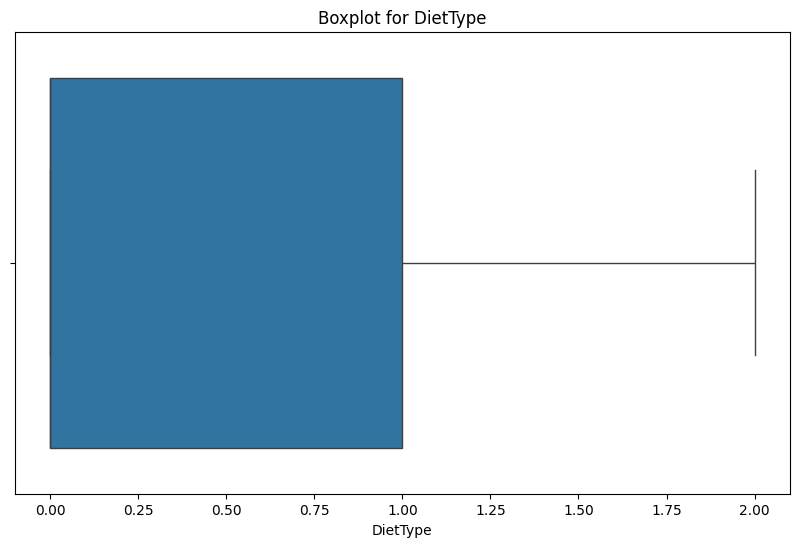

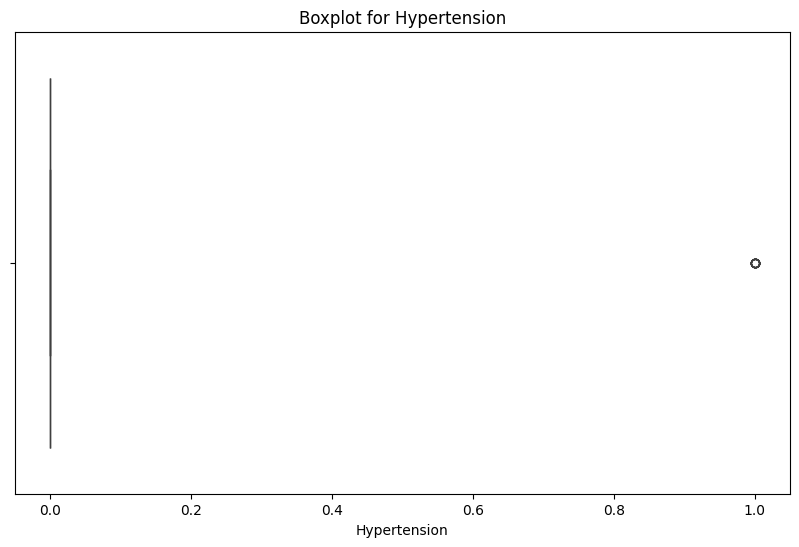

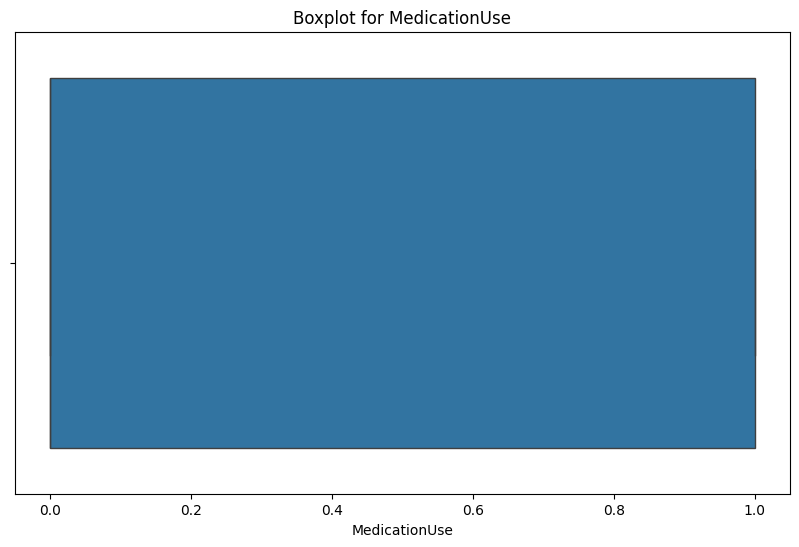

In [ ]:
# List of column names to generate boxplots
columns = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
           'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
           'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse']

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


<ipython-input-17-79ffd3983c11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HDL'] = df['HDL'].clip(upper=100)


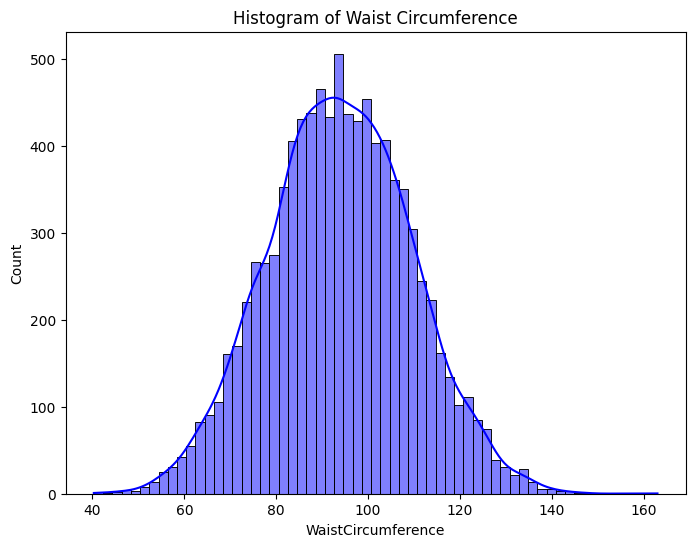

In [ ]:
# Remove rows where HDL < 20 (unrealistic values)
df = df[df['HDL'] >= 20]

# Cap HDL values above 100 mg/dL (if needed)
df['HDL'] = df['HDL'].clip(upper=100)

# Plotting a histogram to see the distribution of waist circumference
plt.figure(figsize=(8, 6))
sns.histplot(df['WaistCircumference'], kde=True, color='blue')
plt.title('Histogram of Waist Circumference')
plt.show()

# Cap Hip Circumference values above 150 cm
df['HipCircumference'] = df['HipCircumference'].clip(upper=150)



# Alternatively, cap WHR values above 1.2 (for women) or 1.0 (for men)
df['WHR'] = df['WHR'].clip(upper=1.2)  # Cap for women


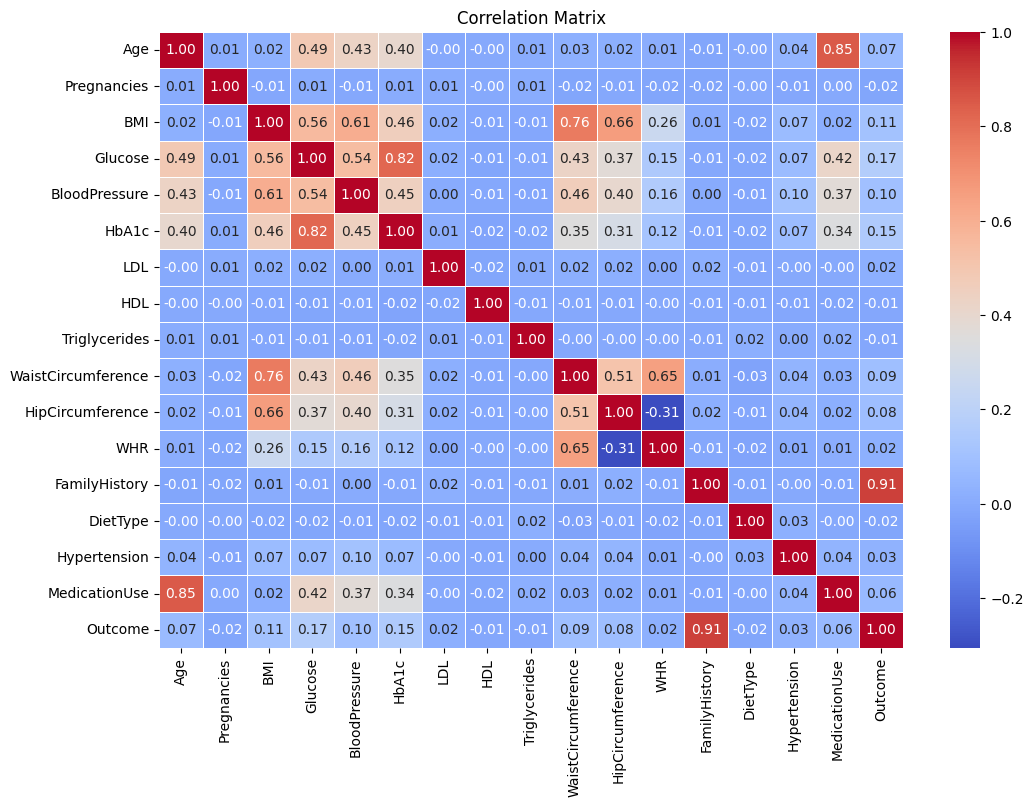

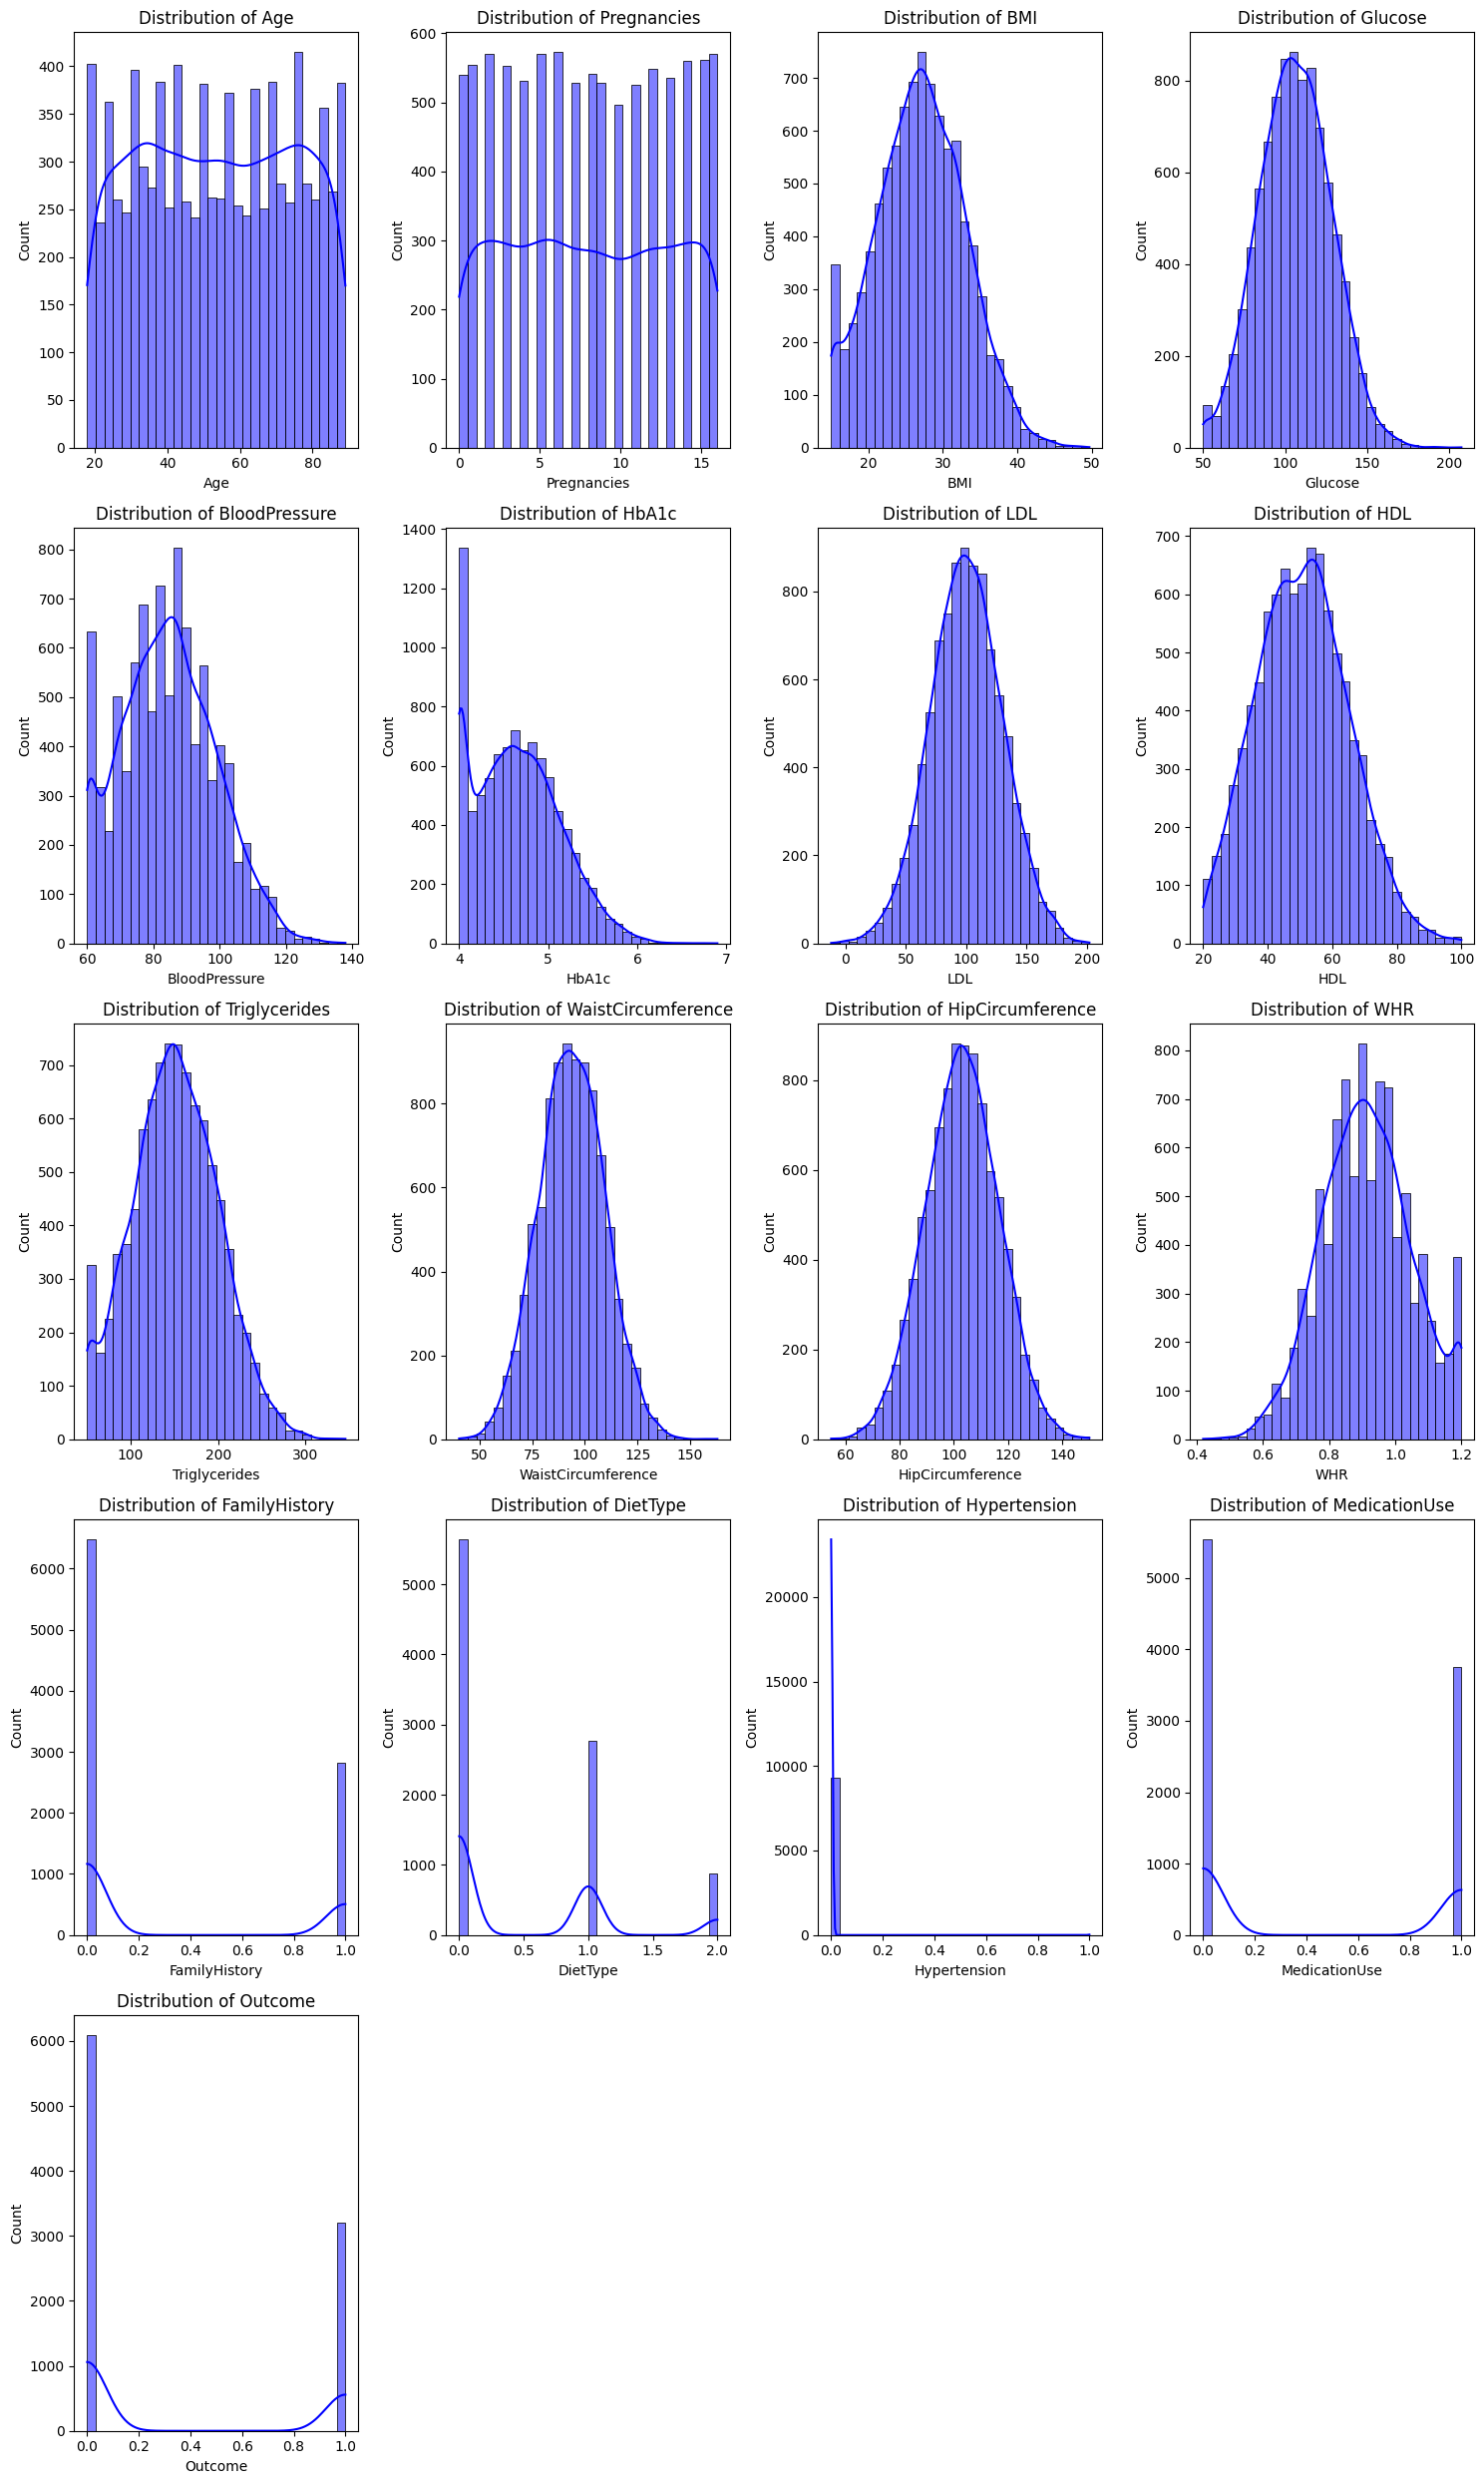

In [ ]:
import math

# 1. Correlation Matrix
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Distribution Plots for Each Numeric Variable
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for the subplot grid
num_plots = len(numeric_columns)
cols = 4
rows = math.ceil(num_plots / cols)  # Adjust the rows dynamically

# Create a figure to hold all distribution plots
plt.figure(figsize=(15, 5 * rows))

# Loop through each numeric column and plot the distribution
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)  # Adjust rows and columns dynamically
    sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Assuming 'Outcome' is the target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(f"SMOTE Training Set Shape: {X_train.shape}")

print(X)
# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train an SVM model (with RBF kernel)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



SMOTE Training Set Shape: (9742, 16)
      Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumferenc

Random Forest Accuracy: 0.9989241527703067
              feature  importance
0       FamilyHistory    0.784691
1             Glucose    0.107972
2               HbA1c    0.037827
3       BloodPressure    0.009413
4                 BMI    0.008871
5  WaistCircumference    0.007544
6                 Age    0.006691
7    HipCircumference    0.006479
8                 HDL    0.005370
9                 LDL    0.005067


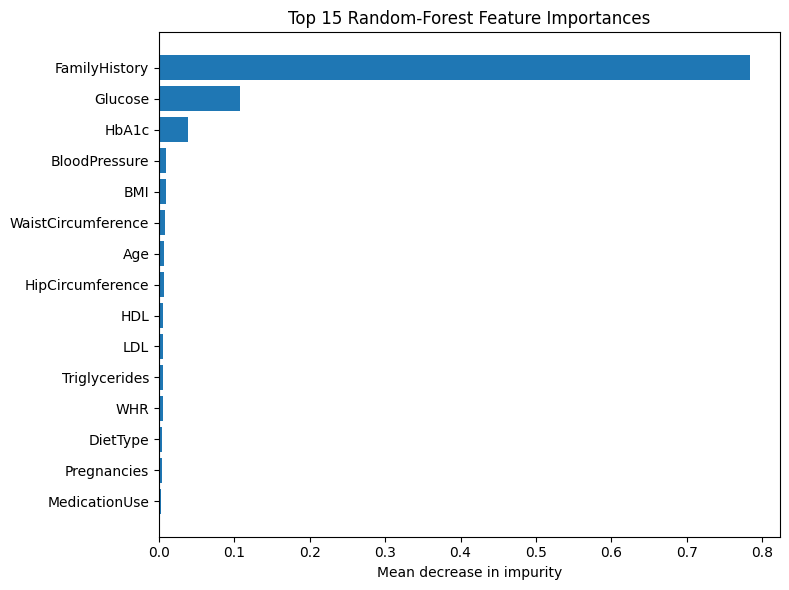

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


# --- 1. Get the raw importances ---
importances = rf_model.feature_importances_
feature_names = X_train.columns                      # assumes X_train is a pandas DataFrame

# --- 2. Put into a tidy table and sort descending ---
imp_df = (pd.DataFrame({"feature": feature_names,
                        "importance": importances})
          .sort_values("importance", ascending=False)
          .reset_index(drop=True))

print(imp_df.head(10))        # top 10 most influential predictors

# --- 3. (Optional) bar plot of the top N features ---
N = 15
plt.figure(figsize=(8, 6))
plt.barh(imp_df["feature"][:N][::-1],   # reverse so the largest is at the top
         imp_df["importance"][:N][::-1])
plt.xlabel("Mean decrease in impurity")
plt.title(f"Top {N} Random-Forest Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9994620763851533


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Evaluate Random Forest model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Evaluate Gradient Boosting model
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1218
           1       0.99      0.99      0.99       641

    accuracy                           0.99      1859
   macro avg       0.99      0.99      0.99      1859
weighted avg       0.99      0.99      0.99      1859

SVM Confusion Matrix:
 [[1211    7]
 [   4  637]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       1.00      1.00      1.00       641

    accuracy                           1.00      1859
   macro avg       1.00      1.00      1.00      1859
weighted avg       1.00      1.00      1.00      1859

Random Forest Confusion Matrix:
 [[1216    2]
 [   0  641]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       

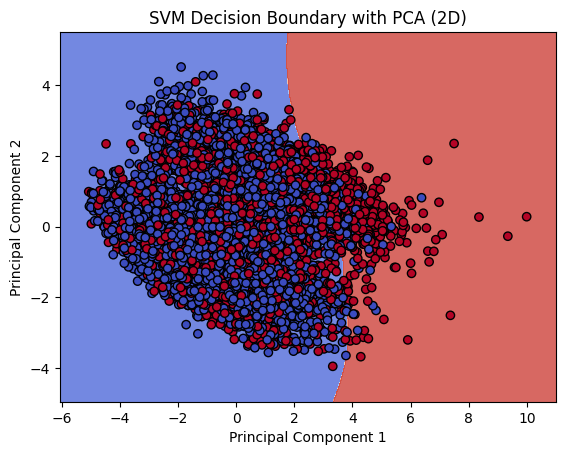

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is the feature matrix

# Step 2: Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Fit the SVM model using the 2D PCA components
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_pca, y)

# Step 4: Create a mesh grid for plotting the decision boundary
h = .02  # Step size in the mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Step 5: Get model predictions for each point in the mesh
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Step 7: Scatter plot of the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA (2D)')
plt.show()



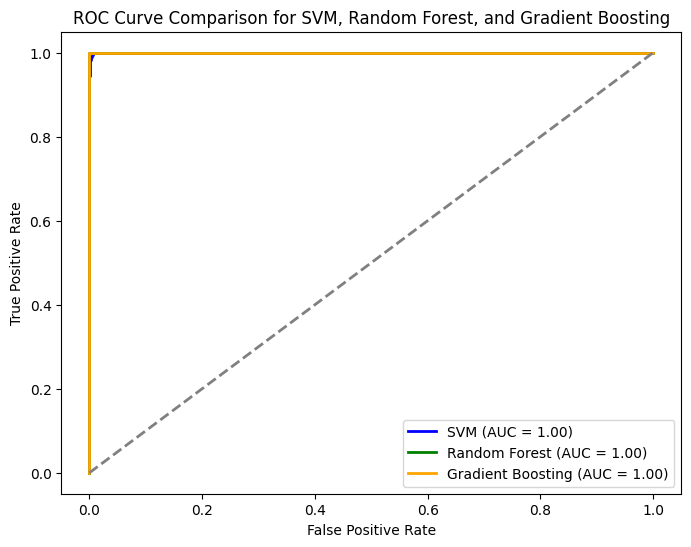

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Assuming the data is already loaded and split into X_train, X_test, y_train, y_test

# Step 1: Standardizing the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SVM ROC Curve and AUC
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Get probabilities for class 1 (positive class) in SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 2. Random Forest ROC Curve and AUC
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get probabilities for class 1 (positive class) in Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 3. Gradient Boosting ROC Curve and AUC
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Get probabilities for class 1 (positive class) in Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# 4. Plot ROC Curves for All Models
plt.figure(figsize=(8, 6))

# Plot ROC for SVM
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot ROC for Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot ROC for Gradient Boosting
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Diagonal line for random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for SVM, Random Forest, and Gradient Boosting')
plt.legend(loc='lower right')
plt.show()



              feature  importance
0       FamilyHistory    0.784691
1             Glucose    0.107972
2               HbA1c    0.037827
3       BloodPressure    0.009413
4                 BMI    0.008871
5  WaistCircumference    0.007544
6                 Age    0.006691
7    HipCircumference    0.006479
8                 HDL    0.005370
9                 LDL    0.005067


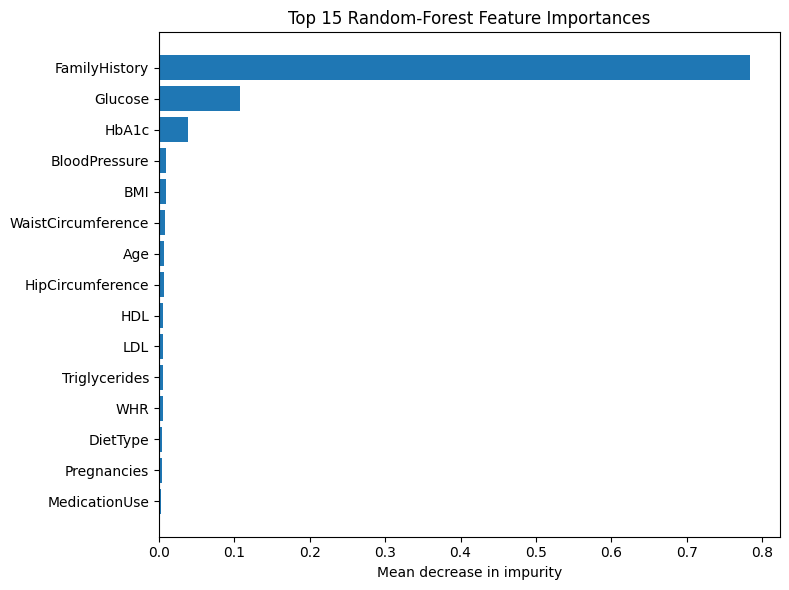

Random Forest - Training Accuracy: 1.0000, Test Accuracy: 0.9989
Gradient Boosting - Training Accuracy: 0.9980, Test Accuracy: 0.9995


In [ ]:
from sklearn.metrics import accuracy_score

# 1. Random Forest Performance on Training and Test Data
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Accuracy on Training Data
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
# Accuracy on Test Data
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

# 2. Gradient Boosting Performance on Training and Test Data
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

# Accuracy on Training Data
gb_train_accuracy = accuracy_score(y_train, gb_train_pred)
# Accuracy on Test Data
gb_test_accuracy = accuracy_score(y_test, gb_test_pred)


# --- 1. Get the raw importances ---
importances = rf_model.feature_importances_
feature_names = X_train.columns                      # assumes X_train is a pandas DataFrame

# --- 2. Put into a tidy table and sort descending ---
imp_df = (pd.DataFrame({"feature": feature_names,
                        "importance": importances})
          .sort_values("importance", ascending=False)
          .reset_index(drop=True))

print(imp_df.head(10))        # top 10 most influential predictors

# --- 3. (Optional) bar plot of the top N features ---
N = 15
plt.figure(figsize=(8, 6))
plt.barh(imp_df["feature"][:N][::-1],   # reverse so the largest is at the top
         imp_df["importance"][:N][::-1])
plt.xlabel("Mean decrease in impurity")
plt.title(f"Top {N} Random-Forest Feature Importances")
plt.tight_layout()
plt.show()

# Print the results
print(f"Random Forest - Training Accuracy: {rf_train_accuracy:.4f}, Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Gradient Boosting - Training Accuracy: {gb_train_accuracy:.4f}, Test Accuracy: {gb_test_accuracy:.4f}")


In [ ]:
from sklearn.model_selection import cross_val_score

# For Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation

# For Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Gradient Boosting Cross-Validation Scores: {gb_cv_scores}")

# Calculate the average cross-validation score
print(f"Random Forest Average CV Score: {rf_cv_scores.mean():.4f}")
print(f"Gradient Boosting Average CV Score: {gb_cv_scores.mean():.4f}")


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Gradient Boosting Cross-Validation Scores: [1. 1. 1. 1. 1.]
Random Forest Average CV Score: 1.0000
Gradient Boosting Average CV Score: 1.0000


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# 1. Load data, deduplicate
df = pd.read_csv("diabetes_dataset.csv").drop_duplicates()

# 2. Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 3. Build pipeline (ensures scaler fits only on train folds)
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))

# 4. Cross-validate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc")
print("Leak-checked CV AUC:", scores.mean(), "±", scores.std())


Leak-checked CV AUC: 1.0 ± 0.0


In [ ]:
from sklearn.metrics import roc_auc_score

single_auc = (
    X.apply(lambda col: roc_auc_score(y, col), axis=0)
      .sort_values(ascending=False)
)
print(single_auc.head(10))


FamilyHistory         0.939519
Glucose               0.581735
HbA1c                 0.573039
BMI                   0.562026
BloodPressure         0.555213
WaistCircumference    0.550974
HipCircumference      0.548625
Age                   0.541582
MedicationUse         0.533389
WHR                   0.512116
dtype: float64
